# Kickstarter Project Forecast Model

## 1. First understanding

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
df = pd.read_csv('data/kickstarter.csv')
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


## 2. Data cleaning

In [11]:
# drop ID, goal, pledged, usd pledged
df.drop(columns=['ID', 'goal', 'pledged', 'usd pledged','name'], inplace=True)
df.head()

,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real
0,Poetry,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,failed,0,GB,0.0,1533.95
1,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,failed,15,US,2421.0,30000.00
2,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,failed,3,US,220.0,45000.00
3,Music,Music,USD,2012-04-16,2012-03-17 03:24:11,failed,1,US,1.0,5000.00
4,Film & Video,Film & Video,USD,2015-08-29,2015-07-04 08:35:03,canceled,14,US,1283.0,19500.00


In [12]:
# drop null
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   category          378661 non-null  object 
 1   main_category     378661 non-null  object 
 2   currency          378661 non-null  object 
 3   deadline          378661 non-null  object 
 4   launched          378661 non-null  object 
 5   state             378661 non-null  object 
 6   backers           378661 non-null  int64  
 7   country           378661 non-null  object 
 8   usd_pledged_real  378661 non-null  float64
 9   usd_goal_real     378661 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 28.9+ MB


## 3. EDA

### 3.1 Tỉ lệ các loại state

In [26]:
variable = 'state'

pie_chart = df[variable].value_counts()
output = pd.DataFrame((df[variable].value_counts()))

In [27]:
temp_pie = pie_chart[:4]
temp_pie[3] = pie_chart[3:6].sum()
temp_pie = temp_pie.rename(index= {'undefined' : 'others'})
temp_pie.name = ''

C:\Users\Admin\AppData\Local\Temp\ipykernel_2972\465998926.py:2: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  temp_pie[3] = pie_chart[3:6].sum()


In [28]:
output['Share'] = (output / output.sum()*100).round(2)
output['Share'] = output['Share'].map("{:,.2f}%".format)
output.index.rename('state', inplace=True)

,count,Share
state,,
failed,197719,52.22%
successful,133956,35.38%
canceled,38779,10.24%
undefined,3562,0.94%
live,2799,0.74%
suspended,1846,0.49%


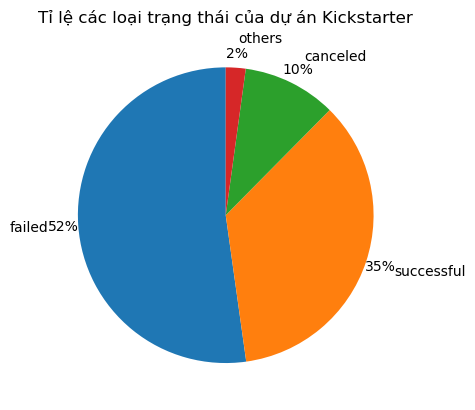

In [29]:
#pie_chart.plot(kind = "pie", startangle=90, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
temp_pie.plot(kind = "pie", startangle=90, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.title('Tỉ lệ các loại trạng thái của dự án Kickstarter')
output

### 3.2 Tỉ lệ các loại main_category

### 3.3 Số lượng thành công và thất bại của mỗi main category

### 3.4 Tổng usd_pledged_real của mỗi main category

### 3.5 Tác động của usd_pledged_real và usd_goal_real đến khả năng thành công

### 3.6 Tỉ lệ tham gia của các quốc gia

### 3.7 Số lượng backer trung bình của các quốc gia

### 3.8 usd_goal_real và usd_pledged_real trung bình của các quốc gia

## 4. Data Pre-processing